In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a=pd.read_table(r'train.txt',names=['X1','X2','Y'])

In [3]:
a

,X1,X2,Y
0,-0.834616,-0.011411,+
1,-0.284662,-0.348672,-
2,-0.208069,-0.036012,+
3,-1.395716,-0.111376,-
4,-0.342596,-0.140167,+
...,...,...,...
195,-1.258754,-0.411435,-
196,-0.302514,-0.364336,-
197,-0.275014,-0.424585,-
198,-0.821729,-0.424306,-


In [4]:
#这样就读取到了数据下面开始进行感知机算法

In [5]:
a.loc[:,'Y']=a.loc[:,'Y'].map(lambda x:1 if x=='+' else -1)

In [6]:
da=np.array(a)

In [7]:
x=da[:,:2]#x

In [8]:
y=da[:,2:]#y

In [9]:
#数据读取完毕

In [10]:
x.shape

(200, 2)

In [11]:
b=0

In [12]:
w=np.zeros(x.shape[1])
#w=np.zeros(x.shape[1])#出示的w

In [13]:
step=0.005#步长

In [14]:
wn=w
yn=y
xn=x

In [15]:
yt=((np.dot(x,wn.T)+b)*y[:,0])

In [16]:
f=np.where(yt<=0)[0]

In [17]:
while len(f)!=0:
    posion=np.random.randint(yt[f].shape[0])
    xn=x[f[posion],:]
    yn=y[f[posion],:]#错误的点的集合的y值
    #梯度下降
    b=b+step*yn
    wn=wn+step*yn*xn
    f=np.where(((np.dot(x,wn.T)+b)*y[:,0])<=0)[0]

In [18]:
wn

array([0.02681296, 0.09370261])

In [19]:
b

array([0.04])

In [20]:
%matplotlib notebook

<IPython.core.display.Javascript object>


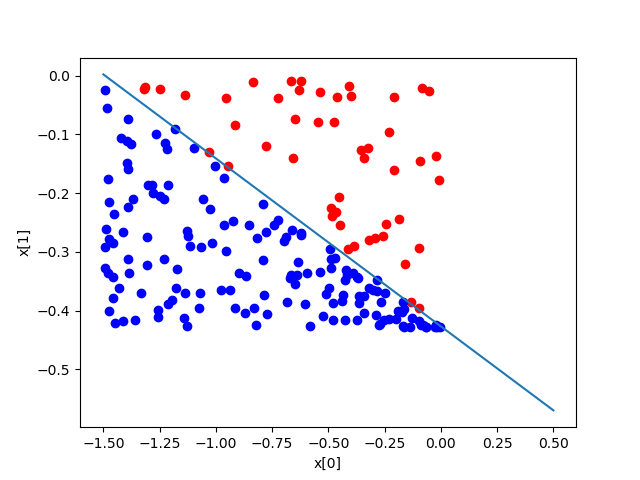

In [21]:
fig=plt.figure()

In [22]:
#显示
ax=fig.add_subplot(1,1,1)

In [23]:
po1=da[np.where(y==1)[0],:]
#where返回的是一个元组

In [24]:
po2=da[np.where(y==-1)[0],:]

In [25]:
x=np.arange(-1.5,1)

In [26]:
y=(wn[0] * x + b) / (-wn[1])

In [27]:
ax.scatter(po1[:,0],po1[:,1],color='red')
ax.scatter(po2[:,0],po2[:,1],color='blue')
ax.plot(x,y,label='分割线')
ax.set_xlabel("x[0]")
ax.set_ylabel("x[1]")

Text(0, 0.5, 'x[1]')